<a href="https://www.kaggle.com/code/gustavolenin/seoul-bike-sharing-demand?scriptVersionId=105173921" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Definição do Problema

# Sistema de compartilhamento de bicicletas na Cidade de Seoul

Atualmente, as bicicletas de aluguel são bastante utilizadas em muitas cidades como uma alternativa para aumentar o conforto da mobilidade. Sabe-se que é importante disponibilizar a bicicleta de forma acessível ao público assim como no horário certo pois diminui o tempo de espera. Dessa forma, fornecer à cidade um suprimento adequado de bicicletas para aluguel se torna uma grande preocupação.

A parte crucial é a previsão do número de bicicletas necessário a cada hora para o fornecimento estável de bicicletas de aluguel.

Visando analisar este problema e obter insights através dos dados obteve-se este dataset que contém a contagem de bicicletas públicas alugadas a cada hora no sistema de compartilhamento de bicicletas em Seoul com os dados meteorológicos e informações de feriados.

# 2. Extração dos Dados

In [1]:
# Importação de Bibliotecas

# Importando Numpy - Biblioteca utilizada para realizar operações envolvendo álgebra linear
import numpy as np 

# Importando Pandas - Biblioteca utilizada para realizar extração e manipulação de dados
import pandas as pd

# Importando Matplotlib e Seaborn - Bibliotecas utilizadas para realizar a Visualização dos Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Importando Profiling - Ferramenta que nos auxilia na Análise Exploratória de Dados
#from pandas_profiling import ProfileReport

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Importando Sweetviz - Ferramenta que nos auxilia na Análise Exploratória de Dados
#!pip install sweetviz
#import sweetviz 

# Extração dos Dados
data = pd.read_csv('/kaggle/input/seoul-bike-rent/SeoulBikeData.csv',encoding= 'unicode_escape')

# Exibição das 5 Primeiras Linhas do DataFrame
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# 3. Preparação dos Dados

In [2]:
# Descrição dos Dados

data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [3]:
# Renomear as colunas substituindo os espaços por underlines 
data.columns = data.columns.str.replace(' ', '_')

In [4]:
data[['Day','Month','Year']] = data['Date'].str.split('/', expand=True)

In [5]:
# Dimensão do Dataset

print('Número de Linhas = ',data.shape[0])
print('Número de Colunas = ',data.shape[1])

Número de Linhas =  8760
Número de Colunas =  17


In [6]:
# Tipo de Cada Coluna

data.dtypes

Date                          object
Rented_Bike_Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind_speed_(m/s)             float64
Visibility_(10m)               int64
Dew_point_temperature(°C)    float64
Solar_Radiation_(MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall_(cm)                float64
Seasons                       object
Holiday                       object
Functioning_Day               object
Day                           object
Month                         object
Year                          object
dtype: object

In [7]:
# Verificando a existência de possíveis valores ausentes

data.isnull().sum()

Date                         0
Rented_Bike_Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind_speed_(m/s)             0
Visibility_(10m)             0
Dew_point_temperature(°C)    0
Solar_Radiation_(MJ/m2)      0
Rainfall(mm)                 0
Snowfall_(cm)                0
Seasons                      0
Holiday                      0
Functioning_Day              0
Day                          0
Month                        0
Year                         0
dtype: int64

Notamos que não há valores ausentes

Antes de avançarmos para exploração e visualização dos dados uma vez que estamos interessados na quantidade de bicicletas alugadas, filtraremos os dados para apenas os dias em que a prática de aluguel esteve em funcionamento.

In [8]:
df = data[data['Functioning_Day'] == 'Yes']

# 4. Exploração / Visualização dos Dados

In [9]:
# Estatística Descritiva

# O comando describe retorna parâmetros estatísticos tais como: contagem de linhas, média, desvio 
# padrão, mínimo, máximo, primeiro, segundo e terceiro quartis.
# Deve-se lembrar que este comando só se aplica às variáveis numéricas.

df_describe = df.describe().T
df_describe

,count,mean,std,min,25%,50%,75%,max
Rented_Bike_Count,8465.0,729.156999,642.351166,2.0,214.0,542.00,1084.00,3556.00
Hour,8465.0,11.507029,6.920899,0.0,6.0,12.00,18.00,23.00
Temperature(°C),8465.0,12.771057,12.104375,-17.8,3.0,13.50,22.70,39.40
Humidity(%),8465.0,58.147194,20.484839,0.0,42.0,57.00,74.00,98.00
Wind_speed_(m/s),8465.0,1.725883,1.034281,0.0,0.9,1.50,2.30,7.40
Visibility_(10m),8465.0,1433.873479,609.051229,27.0,935.0,1690.00,2000.00,2000.00
Dew_point_temperature(°C),8465.0,3.944997,13.242399,-30.6,-5.1,4.70,15.20,27.20
Solar_Radiation_(MJ/m2),8465.0,0.567868,0.868245,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8465.0,0.149120,1.125540,0.0,0.0,0.00,0.00,35.00
Snowfall_(cm),8465.0,0.077685,0.444063,0.0,0.0,0.00,0.00,8.80


Embora bastante útil, o comando describe não expressa alguns parâmetros estatísticos relevantes para a análise de dados, tais como: skewness, kurtosis.

df.skew() retorna um valor que nos indica como está a distribuição dos dados para aquela váriavel
ou seja, se os dados estão simétricos ou assimétricos, caso estejam assimétricos podemos saber se
está para esquerda ou para a direita. 

Kurtosis é uma medida que caracteriza o achatamento da curva da função de distribuição de 
probabilidade, de tal forma que para uma distribuição normal, o valor de Kurtosis é 3. Frequentemente 
utiliza-se como parâmetro o excesso de kurtosis, obtido apenas realizando a subtração do valor de 
kurtosis por 3.

Se o excesso de kurtosis for igual a 0 significa dizer que se trata de uma distribuição normal;

Se o excesso de kurtosis for maior do que 0 significa dizer que a distribuição é mais concentrada do
que a distribuição normal;

Se o excesso de kurtosis for menor do que 0 significa dizer que a distribuição é menos concentrada do
que a distribuição normal;

O comando df.kurtosis() retorna o excesso de kurtosis;

A mediana separa a amostra em duas partes de modo que ela se encontra no centro da amostra. Para obtê-la deve-se ordenar a amostra em ordem crescente ou decrescente e buscar pelo valor que se localiza no centro da amostra.

O comando df.median() retorna a mediana de cada variável pertencente ao DataFrame df.

O intervalo representa a distância entre os dois extremos em uma amostra, ou seja, valor máximo subtraído pelo valor mínimo.

In [10]:
# Definindo as variáveis numéricas e categóricas

num_attributes = df.select_dtypes(include=['int64', 'float64'])
cat_attributes = df.select_dtypes(exclude=['int64', 'float64'])

In [11]:
df_skewness  = pd.DataFrame(num_attributes.skew(),columns=['skew'])
df_kurtosis  = pd.DataFrame(num_attributes.kurtosis(),columns=['kurtosis'])
df_median    = pd.DataFrame(num_attributes.median(),columns=['median'])
df_intervalo = pd.DataFrame(num_attributes.max() - num_attributes.min(),columns=['range'])

In [12]:
df_descritive_statistics = pd.concat([df_describe,df_skewness,df_kurtosis,df_median,df_intervalo],\
                                     axis=1)
df_descritive_statistics

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,median,range
Rented_Bike_Count,8465.0,729.156999,642.351166,2.0,214.0,542.00,1084.00,3556.00,1.139700,0.820305,542.00,3554.00
Hour,8465.0,11.507029,6.920899,0.0,6.0,12.00,18.00,23.00,-0.001261,-1.203446,12.00,23.00
Temperature(°C),8465.0,12.771057,12.104375,-17.8,3.0,13.50,22.70,39.40,-0.174550,-0.889578,13.50,57.20
Humidity(%),8465.0,58.147194,20.484839,0.0,42.0,57.00,74.00,98.00,0.068649,-0.812228,57.00,98.00
Wind_speed_(m/s),8465.0,1.725883,1.034281,0.0,0.9,1.50,2.30,7.40,0.894222,0.754256,1.50,7.40
Visibility_(10m),8465.0,1433.873479,609.051229,27.0,935.0,1690.00,2000.00,2000.00,-0.695306,-0.969125,1690.00,1973.00
Dew_point_temperature(°C),8465.0,3.944997,13.242399,-30.6,-5.1,4.70,15.20,27.20,-0.338775,-0.818766,4.70,57.80
Solar_Radiation_(MJ/m2),8465.0,0.567868,0.868245,0.0,0.0,0.01,0.93,3.52,1.510065,1.145102,0.01,3.52
Rainfall(mm),8465.0,0.149120,1.125540,0.0,0.0,0.00,0.00,35.00,14.616921,289.963779,0.00,35.00
Snowfall_(cm),8465.0,0.077685,0.444063,0.0,0.0,0.00,0.00,8.80,8.292830,90.542378,0.00,8.80


O comando .pairplot gera distribuições univariadas na diagonal e distribuições bivariadas 
fora das diagonais 

A importância desse tipo de gráfico é observar o comportamento das variáveis através de histogramas na diagonal e scatterplots fora da diagonal. Esses scatterplots representam a relação entre os pares de features.

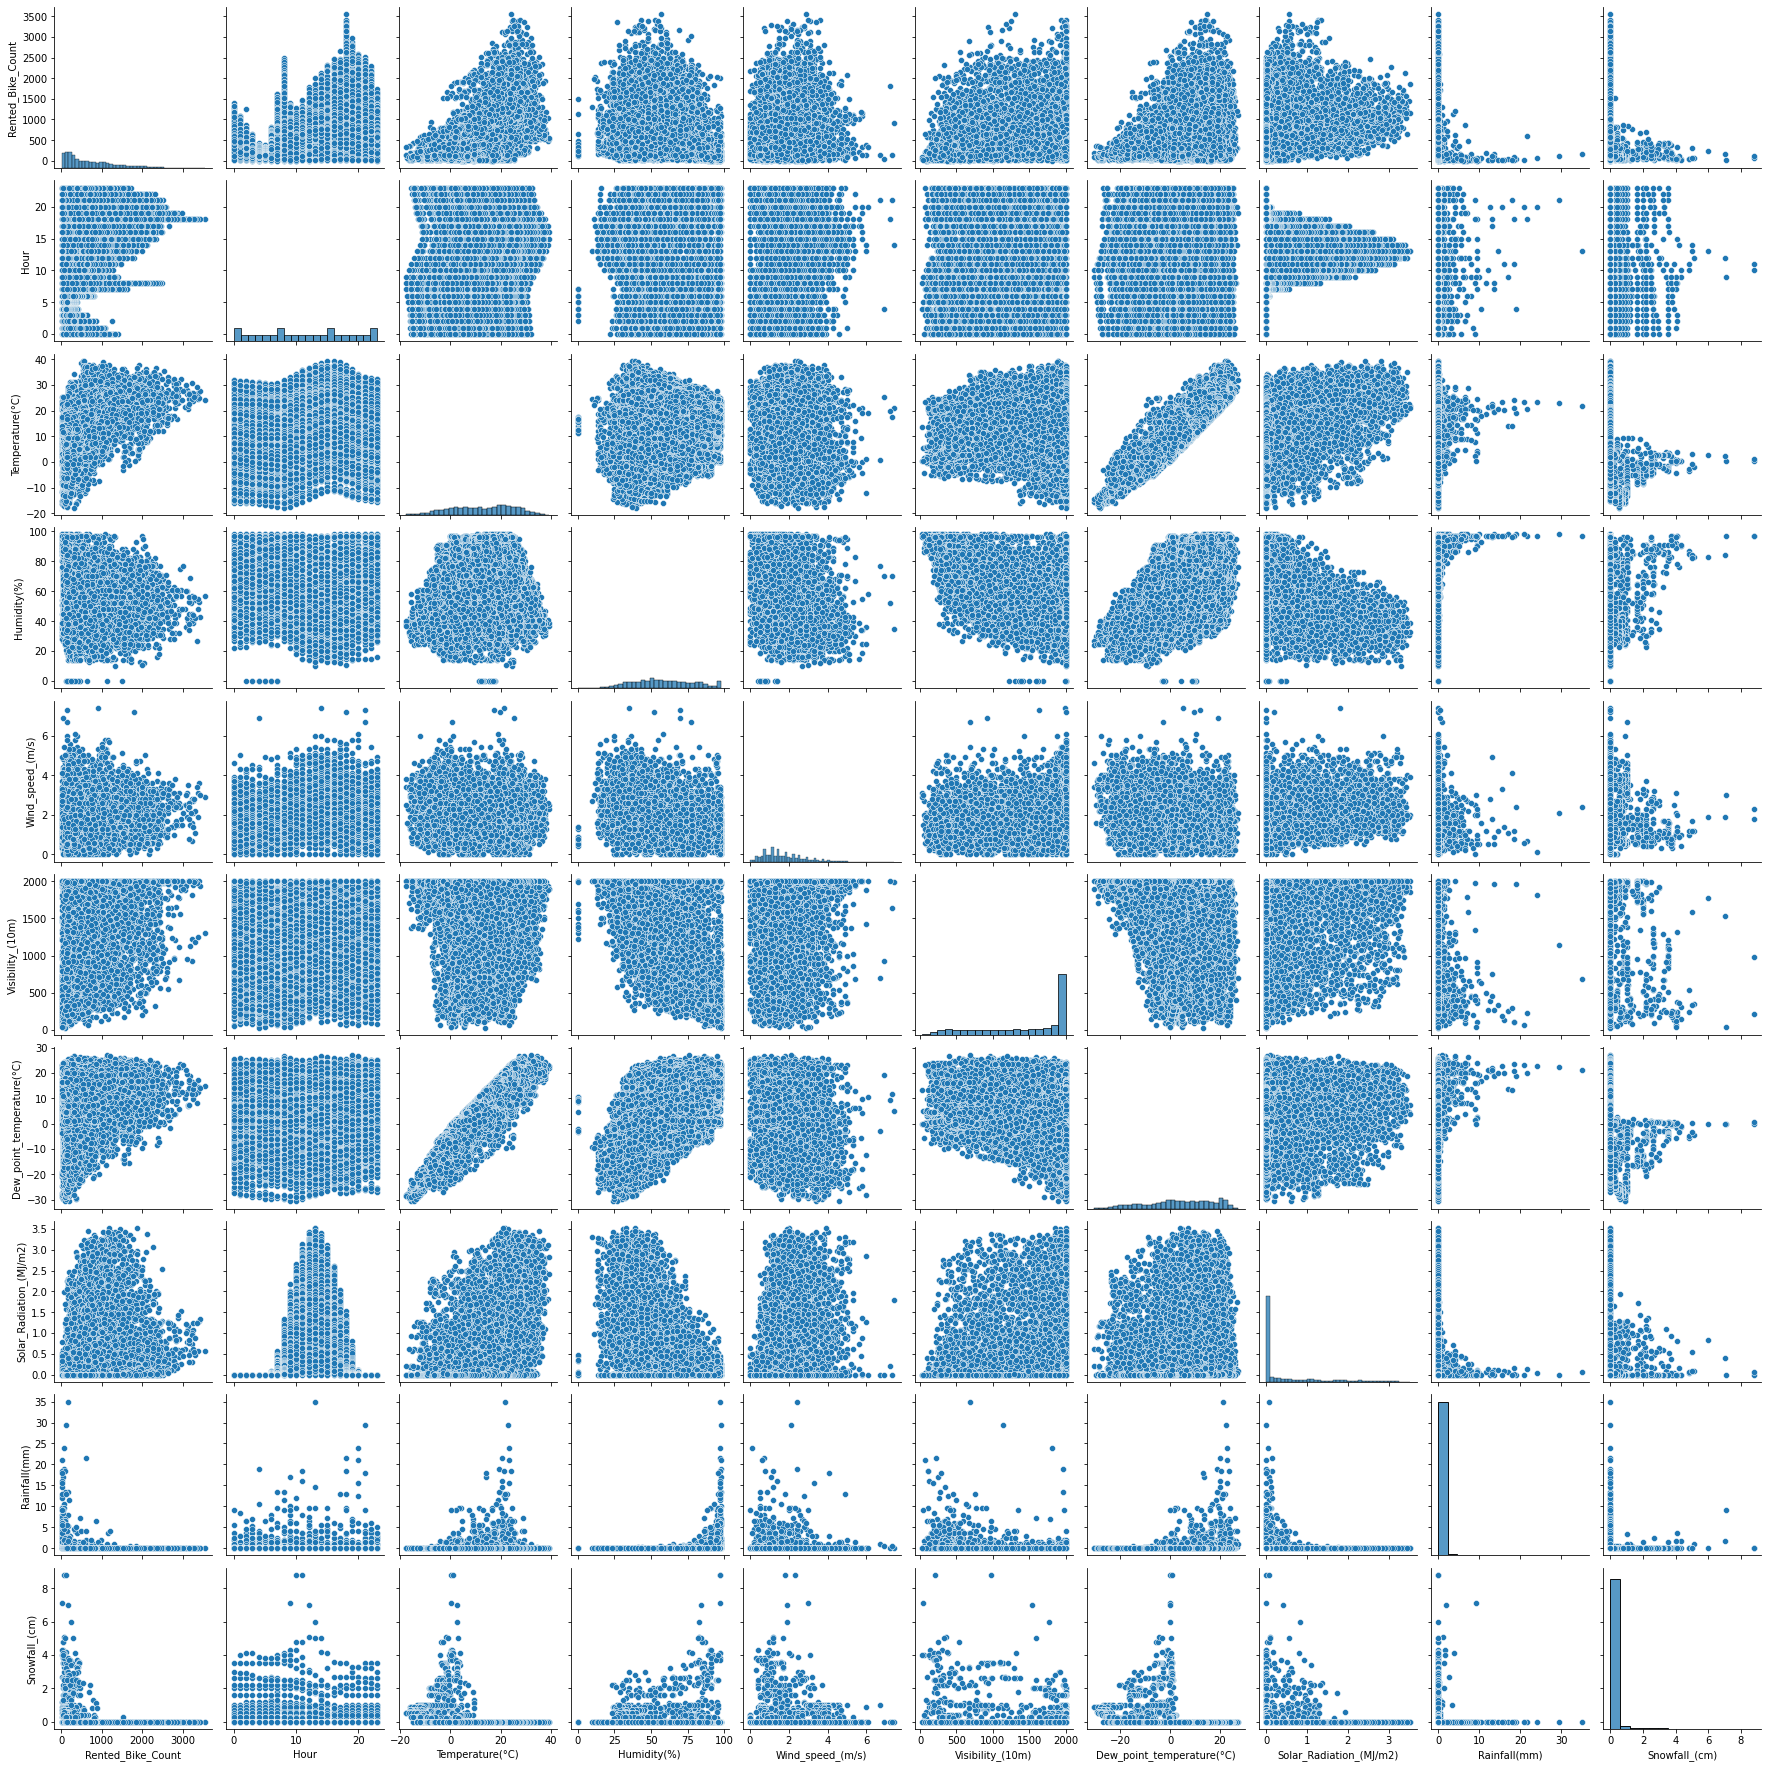

In [13]:
sns.pairplot(df)
plt.show()

A ordem das variáveis no eixo X no sentido da esquerda para a direita segue a ordem de colunas do Dataframe, dessa forma a ordem é representada a seguir: 
Rented Bike Count,
Hour,
Temperature(°C),
Humidity(%),
Wind speed (m/s),
Visibility (10m),
Dew point temperature(°C),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm).

Um exemplo de interpretação que podemos extrair do gráfico acima é a aparente forte relação diretamente proporcional entre a temperatura e a temperatura de ponto de orvalho, portanto esperamos que o valor para o parâmetro de correlação de Pearson para essas duas variáveis seja alto, ou seja, próximo a 1. 

Essa interpretação está correta fisicamente pois sabemos que assumindo a umidade relativa do ar como constante, à medida que se aumenta a temperatura do ar é aumentada a temperatura do ponto de orvalho.

In [14]:
# Aplicando coeficiente de correlação de Pearson
df.corr()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm)
Rented_Bike_Count,1.000000,0.425256,0.562740,-0.201973,0.125022,0.212323,0.400263,0.273862,-0.128626,-0.151611
Hour,0.425256,1.000000,0.122742,-0.235937,0.287780,0.103869,0.004691,0.144658,0.014345,-0.022082
Temperature(°C),0.562740,0.122742,1.000000,0.166425,-0.038481,0.028262,0.914467,0.354844,0.052149,-0.217746
Humidity(%),-0.201973,-0.235937,0.166425,1.000000,-0.337352,-0.548542,0.539402,-0.457273,0.236917,0.110127
Wind_speed_(m/s),0.125022,0.287780,-0.038481,-0.337352,1.000000,0.180428,-0.177170,0.326222,-0.024931,-0.003789
Visibility_(10m),0.212323,0.103869,0.028262,-0.548542,0.180428,1.000000,-0.182586,0.153046,-0.170352,-0.122860
Dew_point_temperature(°C),0.400263,0.004691,0.914467,0.539402,-0.177170,-0.182586,1.000000,0.098525,0.126812,-0.149760
Solar_Radiation_(MJ/m2),0.273862,0.144658,0.354844,-0.457273,0.326222,0.153046,0.098525,1.000000,-0.074157,-0.073380
Rainfall(mm),-0.128626,0.014345,0.052149,0.236917,-0.024931,-0.170352,0.126812,-0.074157,1.000000,0.008604
Snowfall_(cm),-0.151611,-0.022082,-0.217746,0.110127,-0.003789,-0.122860,-0.149760,-0.073380,0.008604,1.000000


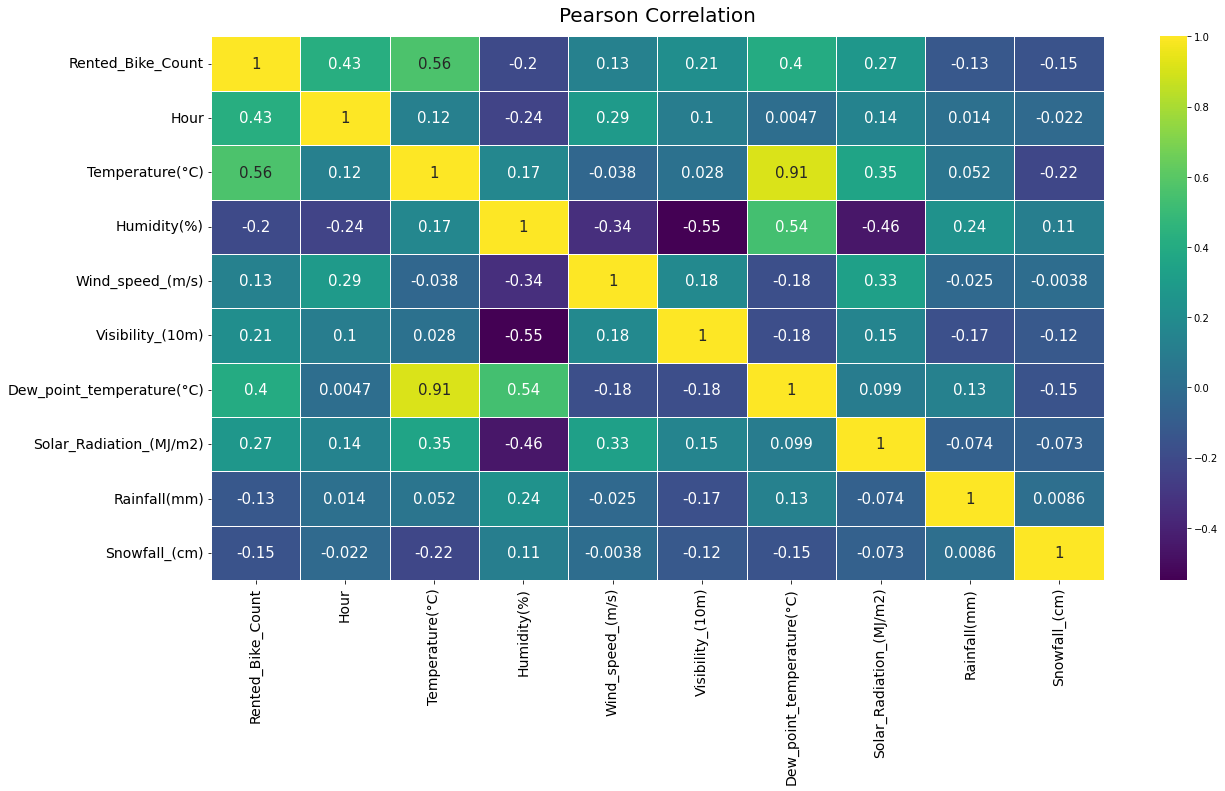

In [15]:
# Visualizar a correlação entre cada variável utilizando a correlação de Pearson 
_ = plt.figure(figsize = (20,10))
res = sns.heatmap(df.corr(), vmax = 1, linewidths = 0.9, cmap = 'viridis',annot_kws={"size": 15},annot=True)
_ = plt.title('Pearson Correlation', fontsize = 20, pad = 15)
_ = res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
_ = res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)

O coeficiente de correlação de Pearson para o par Temperatura e Temperatura do Ponto de Orvalho foi igual a 0,914467. Podemos notar que conforme esperado este valor foi bem próximo a 1.

Podemos nesse momento, expandir a plotagem de histogramas para as demais variáveis numéricas do DataFrame

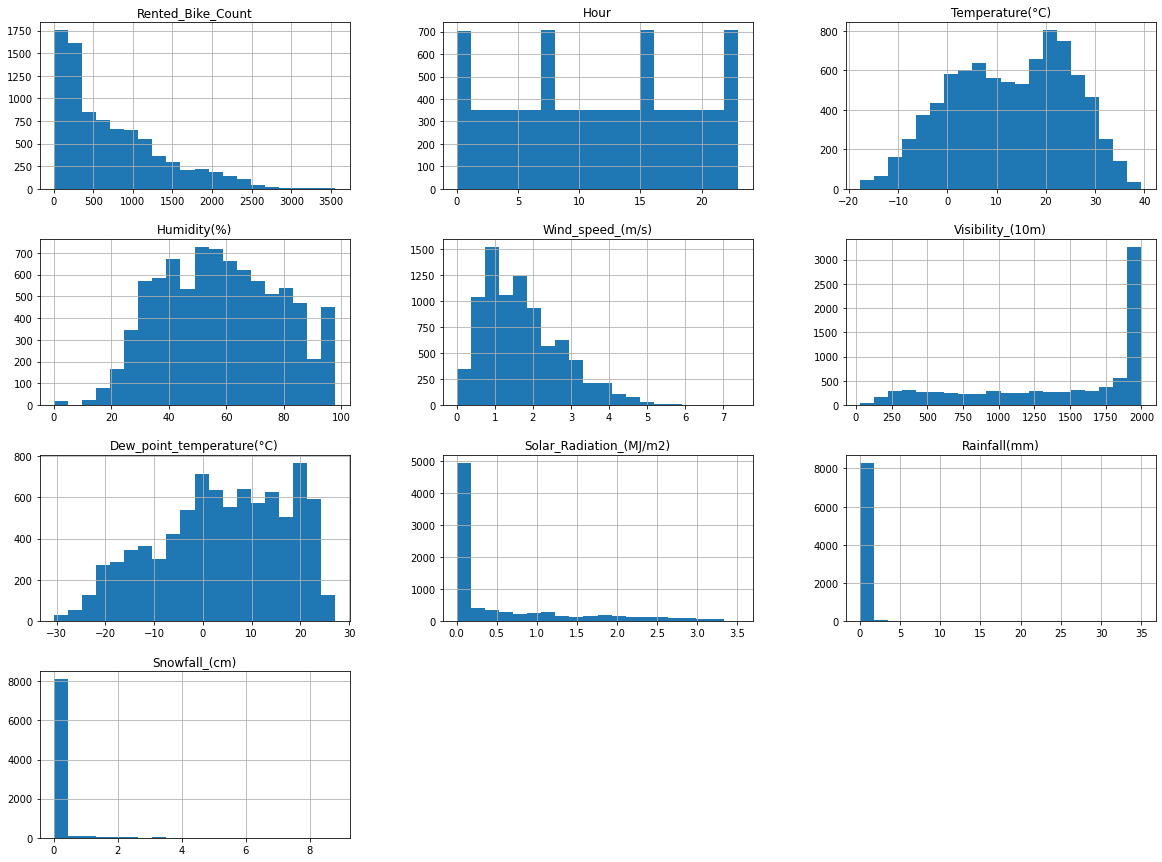

In [16]:
# Plotagem de histogramas 
# Histogramas expressam a distribuição de frequência para variáveis numéricas

_ = df.hist(bins=20,figsize=(20,15))

Observações a partir desses gráficos:

* A maior parte das frequências de bicicletas alugadas esteve de 0 a 1500 bicicletas;
* A cidade na maior parte do período avaliado esteve com a umidade relativa do ar fora da zona ideal para a saúde (40 a 60% segundo a Organização Mundial da Saúde - OMS);
* A maior parte das frequências de velocidades de ventos se concentraram em até 3 m/s;
* A cidade na maior parte do período avaliado contou com boas condições de visibilidade;

Investigando mais a fundo os dados a respeito de umidade relativa do ar, realizaremos um filtro no nosso DataFrame de modo a obter o percentual de de dados que se encontram fora da zonal ideal para a saúde de acordo com a OMS. 

In [17]:
# Cálculo percentual onde foi colocado um filtro para que fossem escolhidos valores  
percent_humidity_health = 100*len(df[(df['Humidity(%)'] >= 40) & (df['Humidity(%)'] <= 60)])/len(df)
print('O percentual de dados pertencentes ao intervalo entre 40 e 60% foi = '+'{0:.2f}'.format(percent_humidity_health),\
      '%')

O percentual de dados pertencentes ao intervalo entre 40 e 60% foi = 34.55 %


Com isso, confirmamos a nossa interpretação obtida através do histograma. 

Tanto o baixo percentual como o alto percentual de umidade relativa possui prejuízo quanto à qualidade de vida humana. Efeitos tais como: desconforto respiratório, crises de asma, coriza, obstrução das vias respiratórias, dor de cabeça, garganta seca, ressecamento da pele, tosse, entre outros sintomas são bastante comuns nesse tipo de contexto.

Portanto, podemos notar o impacto que isto tem na vida das pessoas. Sabendo disso, criaremos **uma hipótese de que valores de umidade relativa do ar menores que 40% ou maiores que 60% reduzem a busca por bicicletas de aluguel.**

**Hipóteses**

1. **Valores de umidade relativa do ar menores que 40% ou maiores que 60% reduzem a busca por bicicletas de aluguel.**
 
2. **Aumento na busca por bicicletas quando as condições visuais aumentam.** 
 
3. **Aumento na velocidade dos ventos aumenta a busca por bicicletas.**
 
4. **Aumento da temperatura ocasiona aumento na busca por bicicletas.**

**Avaliando a Hipótese 1 - Valores de umidade relativa do ar menores que 40% ou maiores que 60% reduzem a busca por bicicletas de aluguel.**

Para avaliarmos se a hipótese de que valores de umidade relativa do ar menores que 40% ou maiores que 60% reduzem a busca por bicicletas de aluguel é verdadeira, extraímos duas amostra do nosso DataFrame. 

A primeira amostra (df_umidade_ideal) contém os dados cujos valores de umidade foram maiores ou iguais a 40% e menores ou iguais a 60%.

A segunda amostra (df_umidade_nao_ideal), por sua vez, contém os dados cujos valores de umidade não estejam dentro da região ideal para a saúde.

In [18]:
# Amostra com dados de umidade ideal
df_umidade_ideal = df[(df['Humidity(%)'] >= 40) & (df['Humidity(%)'] <= 60)]

# Amostra com dados de umidade não ideal
df_umidade_nao_ideal = df[(df['Humidity(%)'] < 40) | (df['Humidity(%)'] > 60)]

In [19]:
print('Média de Quantidade de Bicicletas Alugadas quando a umidade estava \
nas condições ideais de saúde = ',df_umidade_ideal.Rented_Bike_Count.mean())
print('Média de Quantidade de Bicicletas Alugadas quando a umidade não estava \
nas condições ideais de saúde = ',df_umidade_nao_ideal.Rented_Bike_Count.mean())

Média de Quantidade de Bicicletas Alugadas quando a umidade estava nas condições ideais de saúde =  867.8632478632478
Média de Quantidade de Bicicletas Alugadas quando a umidade não estava nas condições ideais de saúde =  655.9231046931408


Nesse momento, faz-se necessário definirmos a **hipótese nula (H0)** e a **hipótese alternativa (H1)**.

**Hipótese nula**: **Média da Amostra com dados de umidade ideal = Média Amostra com dados de umidade não ideal**.

Essa hipótese nula significa dizer que não há diferença na demanda por bicicletas se a umidade relativa do ar estiver nas condições ideais de saúde ou se estiver fora das condições ideais.

**Hipótese Alternativa**: **Média da Amostra com dados de umidade ideal > Média Amostra com dados de umidade não ideal**. 

Essa hipótese alternativa significa que há aumento na demanda por bicicletas se a umidade relativa do ar esteve nas condições ideais de saúde ou se esteve fora das condições ideais.

De acordo com o Teorema do Limite Central quando o tamanho da amostra aumenta, a distribuição amostral da sua média aproxima-se cada vez mais de uma distribuição normal. Sabendo que a amostra é grande o suficiente (n > 30) podemos considerar o teste estatístico dado pelo z-score. 

Além disso, deve-se definir o intervalo de confiança. Nesta análise será utilizado 95%, o que é bastante comum neste tipo de análise, isso significa um nível de significância de 0,05. Portanto, quando realizarmos o teste estatístico e obtivermos o p-valor, se o valor obtido for menor que o valor do nível de significância então poderemos rejeitar a hipótese nula, caso contrário não rejeitaremos a hipótese nula.

In [20]:
from statsmodels.stats.weightstats import ztest
stat, p = ztest(df_umidade_ideal.Rented_Bike_Count, value=\
                 df_umidade_nao_ideal.Rented_Bike_Count.mean(),alternative="larger")
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(2)))

Estatística de teste: 16.75
p-valor: 0.0


Podemos notar que uma vez que p-valor (0,0) < nível de significância (0,05) rejeitamos a hipótese nula.

Portanto, **concluímos que há uma demanda significantemente maior por bicicletas de aluguel em situações em que a umidade relativa do ar está nas condições ideais (entre 40 e 60%).**

**Avaliando a Hipótese 2 - Aumento na busca por bicicletas quando a visibilidade aumenta.**

O procedimento de análise será realizado da mesma forma que anteriormente. Dessa forma, os passos são:

1 - Definir a Hipótese Nula e a Hipótese Alternativa;

2 - Dividir os dados em duas amostras;

3 - Calcular as médias de cada uma das amostras;

4 - Realizar o Teste Z e obter o Valor P;

5 - Avaliar o resultado do valor P e interpretar este resultado.

**Passo 1 - Definição da Hipótese Nula e Hipótese Alternativa**

Obs: No texto a seguir, quando nos referirmos à visibilidade alta queremos fazer menção a valores de visibilidade acima da média, a visibilidade baixa, por sua vez, faz referência a valores de visibilidade abaixo da média.

**Hipótese nula**: **Média da Amostra com dados de Visibilidade Alta = Média da Amostra com dados de Visibilidade Baixa**.

Essa hipótese nula significa dizer que não há diferença na demanda por bicicletas se a visibilidade for alta ou baixa.

**Hipótese Alternativa**: **Média da Amostra com dados de Visibilidade Alta > Média Amostra com dados de Visibilidade Baixa**. 

Essa hipótese alternativa significa que há aumento na demanda por bicicletas se a visibilidade for alta.

In [21]:
print('Maior valor de visibilidade em metros = ',10*df['Visibility_(10m)'].max())
print('Menor valor de visibilidade em metros = ',10*df['Visibility_(10m)'].min())
print('Média dos dados de visibilidade em metros = ',round(10*df['Visibility_(10m)'].mean(),2))

Maior valor de visibilidade em metros =  20000
Menor valor de visibilidade em metros =  270
Média dos dados de visibilidade em metros =  14338.73


Analisaremos se há uma preferência maior para o aluguel de bicicletas quando a visibilidade está acima da visibilidade média, aproximadamente 14338,73 metros, ou se este fator é indiferente. 

**Passo 2 - Dividir os dados em duas amostras;**

In [22]:
# Definindo a amostra 1 - Visibilidade Menor que a Visibilidade Média
df_visibilidade_baixa = df[df['Visibility_(10m)'] < df['Visibility_(10m)'].mean()]

# Definindo a amostra 2 - Visibilidade Maior OU Igual a Visibilidade Média
df_visibilidade_alta = df[df['Visibility_(10m)'] >= df['Visibility_(10m)'].mean()]

**Passo 3 - Calcular as médias de cada uma das amostras;**

In [23]:
# Média da amostra 1 - Visibilidade Menor que a Visibilidade Média
print('Média da Amostra 1 (Visibilidade Menor que a Visibilidade Média) =',
      df_visibilidade_baixa['Visibility_(10m)'].mean())

# Média da amostra 2 - Visibilidade Maior OU Igual a Visibilidade Média
print('Média da Amostra 2 (Visibilidade Maior OU Igual que a Visibilidade Média) =',
      df_visibilidade_alta['Visibility_(10m)'].mean())

Média da Amostra 1 (Visibilidade Menor que a Visibilidade Média) = 782.1859195402299
Média da Amostra 2 (Visibilidade Maior OU Igual que a Visibilidade Média) = 1888.8128385155467


**Passo 4 - Realizar o Teste Z e obter o Valor P;**

In [24]:
# Realizando o teste Z 
from statsmodels.stats.weightstats import ztest
stat, p = ztest(df_visibilidade_alta['Visibility_(10m)'], value=\
                 df_visibilidade_baixa['Visibility_(10m)'].mean(),alternative="larger")
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(2)))

Estatística de teste: 489.27
p-valor: 0.0


**Passo 5 - Avaliar o resultado do valor P e interpretar este resultado.**

Podemos notar que uma vez que p-valor (0,0) < nível de significância (0,05) rejeitamos a hipótese nula.

Portanto, **concluímos que há um aumento na busca por bicicletas quando as condições visuais aumentam.**

**Avaliando a Hipótese 3 - Aumento na velocidade dos ventos aumenta a busca por bicicletas.**

Conforme visto anteriormente, os passos da análise são:

1 - Definir a Hipótese Nula e a Hipótese Alternativa;

2 - Dividir os dados em duas amostras;

3 - Calcular as médias de cada uma das amostras;

4 - Realizar o Teste Z e obter o Valor P;

5 - Avaliar o resultado do valor P e interpretar este resultado.

**Passo 1 - Definição da Hipótese Nula e Hipótese Alternativa**

Obs: No texto a seguir, quando nos referirmos à velocidade alta queremos fazer menção a valores de velocidade acima da média, a velocidade baixa, por sua vez, faz referência a valores de velocidade abaixo da média.

**Hipótese nula**: **Média da Amostra com dados de Velocidade Alta = Média da Amostra com dados de Velocidade Baixa**.

Essa hipótese nula significa dizer que não há diferença na demanda por bicicletas se a velocidade for alta ou baixa.

**Hipótese Alternativa**: **Média da Amostra com dados de Velocidade Alta > Média Amostra com dados de Velocidade Baixa**. 

Essa hipótese alternativa significa que há aumento na demanda por bicicletas se a velocidade for alta.

In [25]:
print('Maior valor de velocidade em metros por segundo = ',df['Wind_speed_(m/s)'].max())
print('Menor valor de velocidade em metros por segundo  = ',df['Wind_speed_(m/s)'].min())
print('Média dos dados de velocidade em metros por segundo = ',round(df['Wind_speed_(m/s)'].mean(),2))

Maior valor de velocidade em metros por segundo =  7.4
Menor valor de velocidade em metros por segundo  =  0.0
Média dos dados de velocidade em metros por segundo =  1.73


Analisaremos se há uma preferência maior para o aluguel de bicicletas quando a velocidade está acima da velocidade média, aproximadamente 1,73 metros por segundo, ou se este fator é indiferente. 

**Passo 2 - Dividir os dados em duas amostras;**

In [26]:
# Definindo a amostra 1 - Visibilidade Menor que a Visibilidade Média
df_velocidade_baixa = df[df['Wind_speed_(m/s)'] < df['Wind_speed_(m/s)'].mean()]

# Definindo a amostra 2 - Visibilidade Maior OU Igual a Visibilidade Média
df_velocidade_alta = df[df['Wind_speed_(m/s)'] >= df['Wind_speed_(m/s)'].mean()]

**Passo 3 - Calcular as médias de cada uma das amostras;**

In [27]:
# Média da amostra 1 - Velocidade Menor que a Velocidade Média
print('Média da Amostra 1 (Velocidade Menor que a Velocidade Média) =',
      df_velocidade_baixa['Wind_speed_(m/s)'].mean())

# Média da amostra 2 - Velocidade Maior OU Igual a Velocidade Média
print('Média da Amostra 2 (Velocidade Maior OU Igual que a Velocidade Média) =',
      df_velocidade_alta['Wind_speed_(m/s)'].mean())

Média da Amostra 1 (Velocidade Menor que a Velocidade Média) = 1.0178542510121458
Média da Amostra 2 (Velocidade Maior OU Igual que a Velocidade Média) = 2.718127659574468


**Passo 4 - Realizar o Teste Z e obter o Valor P;**

In [28]:
# Realizando o teste Z 
from statsmodels.stats.weightstats import ztest
stat, p = ztest(df_velocidade_alta['Wind_speed_(m/s)'], value=\
                 df_velocidade_baixa['Wind_speed_(m/s)'].mean(),alternative="larger")
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(2)))

Estatística de teste: 127.73
p-valor: 0.0


**Passo 5 - Avaliar o resultado do valor P e interpretar este resultado.**

Podemos notar que uma vez que p-valor (0,0) < nível de significância (0,05) podemos rejeitar a hipótese nula.

Portanto, **concluímos que há um aumento significativo na busca por bicicletas quando a velocidade do vento aumenta.**

**Avaliando a Hipótese 4 - Aumento da temperatura ocasiona aumento na busca por bicicletas.**

Conforme visto anteriormente, os passos da análise são:

1 - Definir a Hipótese Nula e a Hipótese Alternativa;

2 - Dividir os dados em duas amostras;

3 - Calcular as médias de cada uma das amostras;

4 - Realizar o Teste Z e obter o Valor P;

5 - Avaliar o resultado do valor P e interpretar este resultado.

**Passo 1 - Definição da Hipótese Nula e Hipótese Alternativa**

Obs: No texto a seguir, quando nos referirmos à temperatura alta queremos fazer menção a valores de temperatura acima da média, a temperatura baixa, por sua vez, faz referência a valores de temperatura abaixo da média.

**Hipótese nula**: **Média da Amostra com dados de Temperatura Alta = Média da Amostra com dados de Temperatura Baixa**.

Essa hipótese nula significa dizer que não há diferença na demanda por bicicletas se a temperatura for alta ou baixa.

**Hipótese Alternativa**: **Média da Amostra com dados de Temperatura Alta > Média Amostra com dados de Temperatura Baixa**. 

Essa hipótese alternativa significa que há aumento na demanda por bicicletas se a temperatura for alta.

In [29]:
print('Maior valor de temperatura em graus Celsius     = ',df['Temperature(°C)'].max())
print('Menor valor de temperatura em graus Celsius     = ',df['Temperature(°C)'].min())
print('Média dos dados de temperatura em graus Celsius = ',round(df['Temperature(°C)'].mean(),2))

Maior valor de temperatura em graus Celsius     =  39.4
Menor valor de temperatura em graus Celsius     =  -17.8
Média dos dados de temperatura em graus Celsius =  12.77


Analisaremos se há uma preferência maior para o aluguel de bicicletas quando a temperatura está acima da temperatura média, aproximadamente 12,77 graus Celsius, ou se este fator é indiferente. 

**Passo 2 - Dividir os dados em duas amostras;**

In [30]:
# Definindo a amostra 1 - Temperatura Menor que a Temperatura Média
df_temperatura_baixa = df[df['Temperature(°C)'] < df['Temperature(°C)'].mean()]

# Definindo a amostra 2 - Temperatura Maior OU Igual a Temperatura Média
df_temperatura_alta = df[df['Temperature(°C)'] >= df['Temperature(°C)'].mean()]

**Passo 3 - Calcular as médias de cada uma das amostras;**

In [31]:
# Média da amostra 1 - Temperatura Menor que a Temperatura Média
print('Média da Amostra 1 (Temperatura Menor que a Temperatura Média) =',
      df_temperatura_baixa['Temperature(°C)'].mean())

# Média da amostra 2 - Temperatura Maior OU Igual a Temperatura Média
print('Média da Amostra 2 (Temperatura Maior OU Igual que a Temperatura Média) =',
      df_temperatura_alta['Temperature(°C)'].mean())

Média da Amostra 1 (Temperatura Menor que a Temperatura Média) = 2.1449757281553397
Média da Amostra 2 (Temperatura Maior OU Igual que a Temperatura Média) = 22.84688147295742


**Passo 4 - Realizar o Teste Z e obter o Valor P;**

In [32]:
# Realizando o teste Z 
from statsmodels.stats.weightstats import ztest
stat, p = ztest(df_temperatura_alta['Temperature(°C)'], value=\
                 df_temperatura_baixa['Temperature(°C)'].mean(),alternative="larger")
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(2)))

Estatística de teste: 237.75
p-valor: 0.0


**Passo 5 - Avaliar o resultado do valor P e interpretar este resultado.**

Podemos notar que uma vez que p-valor (0,0) < nível de significância (0,05) podemos rejeitar a hipótese nula.

Portanto, **concluímos que há um aumento significativo na busca por bicicletas quando a temperatura aumenta.**

**Análise por Estação do Ano**

In [33]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day,Day,Month,Year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017


Além de avaliarmos o comportamento da quantidade de bicicletas alugadas por estação anual, queremos analisar este comportamento baseado nos períodos do dia (manhã, tarde, noite e madrugada). Dessa forma, será criada uma função que definirá o período baseado no horário e em seguida será criada uma nova coluna no DataFrame df contendo estes valores categóricos.

O comando: pd.options.mode.chained_assignment = None , serve para desabilitar alguns alertas. Devemos saber que isto só pode ser feito após análise do código e verificação para ter certeza que ele está funcionando conforme o desejado

In [34]:
pd.options.mode.chained_assignment = None

A função a seguir cria uma coluna no dataframe inserido como entrada e atribui o período baseado no horário utilizando a referência seguinte:

Manhã:     06:00 - 11:59

Tarde:     12:00 - 17:59

Noite:     18:00 - 23:59

Madrugada: 00:00 - 05:59

In [35]:
def periodos(dataframe):
    dataframe['periodo'] = 'Manhã'
    dataframe.periodo[(df['Hour'] >= 0)  & (dataframe['Hour'] < 6)]  = 'Madrugada'
    dataframe.periodo[(df['Hour'] >= 12) & (dataframe['Hour'] < 18)] = 'Tarde'
    dataframe.periodo[(df['Hour'] >= 18) & (dataframe['Hour'] < 24)] = 'Noite'
    
    return dataframe   

df = periodos(df)

A seguir será construído um gráfico a respeito da quantidade de bicicletas alugadas por horário ao longo das quatro estações. 

Obs: 

Seasons - Estações

Winter - Inverno

Spring - Primavera

Summer - Verão

Autumn - Outono

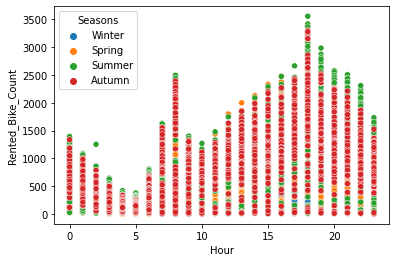

In [36]:
_ = sns.scatterplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Seasons')

Observamos uma menor demanda durante as madrugadas comparado aos demais períodos do dia independentemente da estação do ano considerada.

Visando realizar um comparativo entre as demandas por cada estação, plotamos a seguinte figura:

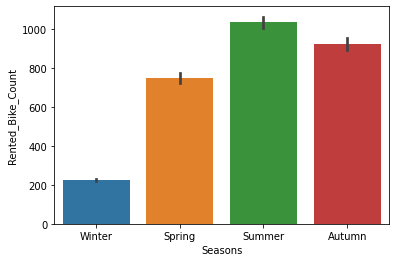

In [37]:
_ = sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count')

Percebemos que a estação com maior procura por aluguel de bicicletas é o verão. O verão é caracterizado por concentrar o período de temperaturas mais altas do ano, dessa forma, esta informação corrobora com a hipótese que validamos anteriormente de que a demanda é maior quando as temperaturas estão mais elevadas.

In [38]:
df.Rented_Bike_Count[df.Holiday == 'Holiday'].mean()

529.1544117647059

In [39]:
df.Rented_Bike_Count[df.Holiday == 'No Holiday'].mean()

739.2849695916594

In [40]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day,Day,Month,Year,periodo
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017,Madrugada
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017,Madrugada
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017,Madrugada
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017,Madrugada
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017,Madrugada


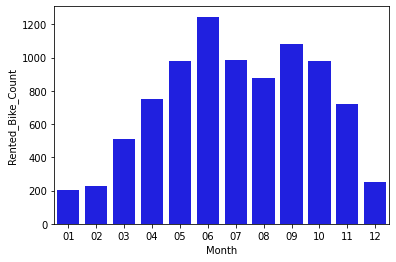

In [41]:
months_df = df.groupby('Month')['Rented_Bike_Count'].mean().reset_index()
_ = sns.barplot(data=months_df,x='Month',y='Rented_Bike_Count',color='blue')

# 5. Conclusões

* Na maior parte do período avaliado a umidade relativa do ar esteve fora da zona ideal para a saúde (40 a 60% segundo a Organização Mundial da Saúde - OMS);
* A cidade na maior parte do período avaliado contou com boas condições de visibilidade;
* Junho foi o mês com maior número de bicicletas alugadas;
* Janeiro foi o mês com menor de bicicletas alugadas;
* Durante as madrugadas foram os períodos onde houve menor busca por bicicletas de aluguel;
* A maior demanda por este serviço ocorreu no verão;
* Houve um aumento significativo na demanda deste serviço quando houve aumento na temperatura local;
* Houve um aumento significativo na busca por bicicletas quando a velocidade do vento aumentou;
* Houve um aumento na busca por bicicletas quando as condições visuais aumentaram;
* Houve uma demanda significantemente maior por bicicletas de aluguel em situações em que a umidade relativa do ar esteve nas condições ideais (entre 40 e 60%);

# Referências e Citações

**Referência**:
[Fonte do dataset](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand)  

**Citações**:
- Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020
- Sathishkumar V E and Yongyun Cho. 'A rule-based model for Seoul Bike sharing demand prediction using weather data' European Journal of Remote Sensing, pp. 1-18, Feb, 2020 